#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données : feuille 2
### Descente de gradient

##### Avant de commencer :
La méthode de la descente de gradient permet de trouver un minimum local d’une fonction de ${\mathbb R}^n$ dans ${\mathbb R}$ . L’objectif de ce TD est de comprendre cette méthode pour pouvoir l’utiliser par la suite dans différentes applications où on cherche à minimiser un critère.


Comme précédemment nous utilisons entre autres <code>numpy</code> pour manipuler vecteurs et matrices.

In [17]:
import numpy as np

### Exercice 1. Polynôme :  calcul et dérivée

1. Ecrivez une fonction python <code>valeurPolynome (coeff, x)</code> qui calcule la valeur du polynôme défini par le vecteur de coefficients <code>coeff</code> pour la valeur <code>x</code>. Les coefficients sont rangés dans l'ordre des puissances croissantes. Par exemple le vecteur $[1, 2, 3]$ définit le polynôme $3x^2+2x+1$. <br>Utilisez pour cela la classe <code>Polynomial</code> du module <code>numpy.polynomial</code>.

In [18]:
from numpy.polynomial import Polynomial

def  valeurPolynome(coeff,x):
    p=Polynomial(coeff) 
    # on transfer le x en array au cas ou on veux calculer une liste des valeurs 
    x=np.array(x)
    print(p(x))
valeurPolynome([1,2,3],2)

17.0


2. Testez cette fonction pour différentes valeurs de <code>x</code> et pour un polynôme dont vous choisirez les coefficients. Remarquez que le paramètre <code>x</code> peut lui même être un vecteur ou une matrice.

In [19]:
valeurPolynome([1,2,3],2)
valeurPolynome([1,2,3],[2,5,4])
valeurPolynome([1,2,3],[[5,7,8],[2,5,4]])

17.0
[17. 86. 57.]
[[ 86. 162. 209.]
 [ 17.  86.  57.]]


3. La dérivée d’un polynôme est elle même un polynôme. Toujours en utilisant la classe <code>Polynomial</code>, écrivez une fonction python <code>derivPoly(coeff)</code> qui retourne le tableau de coefficients représentant la dérivée du polynôme défini par <code>coeff</code>. Testez.

In [20]:
def derivpoly(coeff):
    p=Polynomial(coeff)
    dp=p.deriv()
    print(dp)
derivpoly([1,2,3])

2.0 + 6.0 x


### Exercice 2. Descente de gradient pour trouver le minimum d’une parabole

1. Exécutez le script python suivant : 

In [21]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


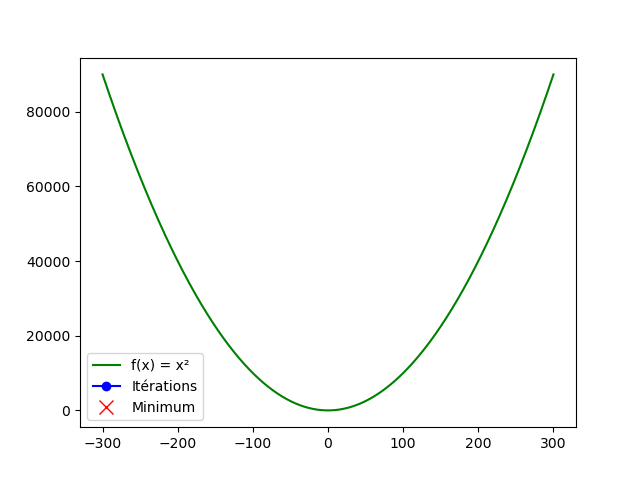

Minimum :  -0.015999999999999986


In [22]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

def parabole(x):
    return x * x
    
x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.6
x0=250
xcurrent = x0 - 2*x0
xprec = x0

# xs et ys servent à stocker, pour l'animation, les valeurs obtenues 
xs = [x0]
ys = [parabole(x0)]
while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    xcurrent = xprec - nu*2*xprec
    xs.append(xcurrent)
    ys.append(parabole(xcurrent))
    
# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(-300,300,600)
ax.plot(X, parabole(X), 'g', label="f(x) = x²")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=600, repeat=False)

plt.show()
ani  # garde la référence pour IPython/Jupyter
print('Minimum : ', xcurrent)



2. Retrouvez dans le code les étapes de l’algorithme de descente du gradient en repérant bien l'utilisation de la dérivée.
3. Comment peut-on obtenir une estimation plus précise de la position du minimum?
4. Testez en modifiant la variable <code>nu</code> par une autre valeur constante inférieure à 1, par exemple <code> nu = 0.6</code>.
Que se passe-t-il si la valeur de nu est fixée à 1 ? Est-ce spécifique à la fonction choisie ?
5. Comparez la version suivante du script avec la précédente

In [ ]:
# 2->xprec  = xcurrent
#     xcurrent = xprec - nu*2*xprec 
#     ->vous avez utilisé la dérivée ici 2*xprec (x[nvl]=x[prec]-v{le pas}*D{derivee}f(x))
# 3->on commence avec un pas gand depuis on demenuie le pas nu (on dois changer la valeur de nu dans la boucle while pour avoir une valeur précise)
# 4->boucle infini (la valeur de x current il vas eguale soit -xpre ou xpre)
# 5->le minimum cette fois  et bein optimiser que la scripte precedent (parce que on deminuie la valeur de nu on utilise la variable attention  )

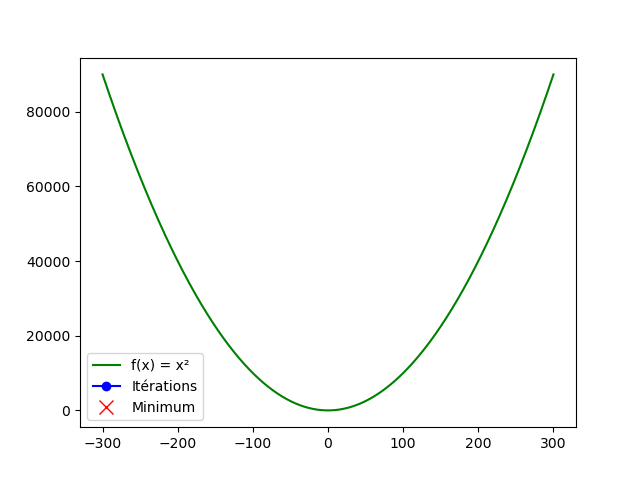

Minimum :  0.0027196136053624087


In [23]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

def parabole(x):
    return x * x

x = np.linspace(-300,300,600)
y = [parabole(i) for i in x]

epsilon = 0.1
nu = 0.1
attenuation = 3
x0=250      
xcurrent = x0 - 2*x0
xprec = x0

# xs et ys servent à stocker, pour l'animation, les valeurs obtenues 
xs = [x0]
ys = [parabole(x0)]
while(abs(xprec - xcurrent) > epsilon):
    xprec  = xcurrent
    nu = 1/np.log(attenuation)
    attenuation = attenuation+1
    xcurrent = xprec - nu*2*xprec
    xs.append(xcurrent)
    ys.append(parabole(xcurrent))

# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(-300,300,600)
ax.plot(X, parabole(X), 'g', label="f(x) = x²")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=600, repeat=False)

# Affichage interactif (avec ipympl)
plt.show()
print('Minimum : ', xcurrent)

7. Comment évolue la variable <code>nu</code> au fur et à mesure des itérations ? Quel est l'intérêt de procéder ainsi?


In [9]:
# 7=> la variable v ne reste pas constatnt. On commence avec un pas d'apprentissage 0.1 et on demenuie sa valeur dans chaque itération (decroissance taux d'apprentisage ).
# =>  l'intérét est de trouver la point minimale rapidement (on commence avec des pas grand pour gagner le temps depuis on deminuie le pas pour prend la point minimale de notr graphe  )

### Exercice 3. Descente de gradient pour trouver le minimum d’un polynôme

1. On choisit comme exemple le polynôme $30 − 61x + 41x^2 − 11x^3 + x^4$ . Ecrivez un script python
qui affiche ce polynôme entre 0 et 6 et qui montre les étapes de la descente de gradient à partir de la valeur initiale 5.

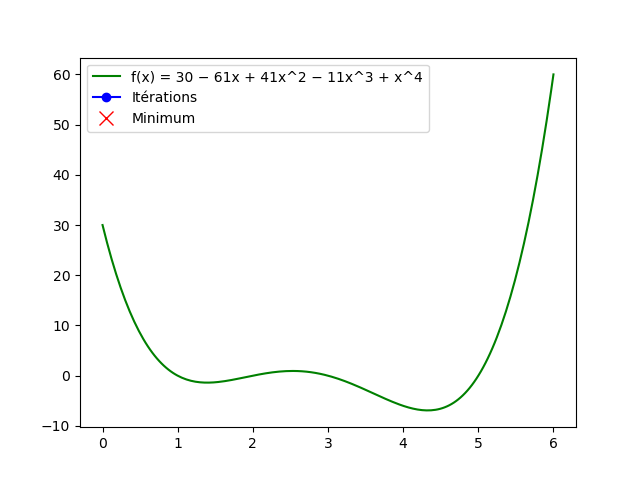

Minimum :  4.423631360000002


In [24]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fonction d'update pour l'animation
def update(frame):
    point.set_data(xs[:frame+1], ys[:frame+1])
    if frame == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:frame+1], ys[:frame+1])
    return point, final

def deriver(x):
    return -61+82*x-33*x*x+4*x*x*x
def poly(x):
    return 30-61*x+41*x*x-11*x*x*x+x*x*x*x

epsilon=0.1
nu=0.02
x0=5
xprec=x0
xcurrent=xprec-nu*deriver(xprec)
xs=[x0]
ys=[poly(x0)]

while(abs(xprec-xcurrent)>epsilon):
    xprec=xcurrent
    xcurrent=xprec-nu*deriver(xprec)
    xs.append(xcurrent)
    ys.append(poly(xcurrent))


# Préparer la figure
fig, ax = plt.subplots()
X = np.linspace(0,6,200)
ax.plot(X, poly(X), 'g', label="f(x) = 30 − 61x + 41x^2 − 11x^3 + x^4")
point, = ax.plot([], [], "ob-", label="Itérations")
final, = ax.plot([], [], "xr", markersize=10, label="Minimum")

ax.legend()

# Animation
ani = FuncAnimation(fig, update, frames=len(xs), interval=6, repeat=False)

# Affichage interactif (avec ipympl)
plt.show()
print('Minimum : ', xcurrent)




3.

### Exercice 4. Descente de gradient pour trouver le minimum d’une surface

1. On choisit comme exemple la fonction définie par $f(x,y) = (x−1)(x−2)+(y+3)(y+4)$. On visualise une partie de la surface correspondante avec le code ci-dessous. Quels sont les intervalles de variation de $x$ et $y$ dans ce code? Quelles sont les coordonnées du minimum ?

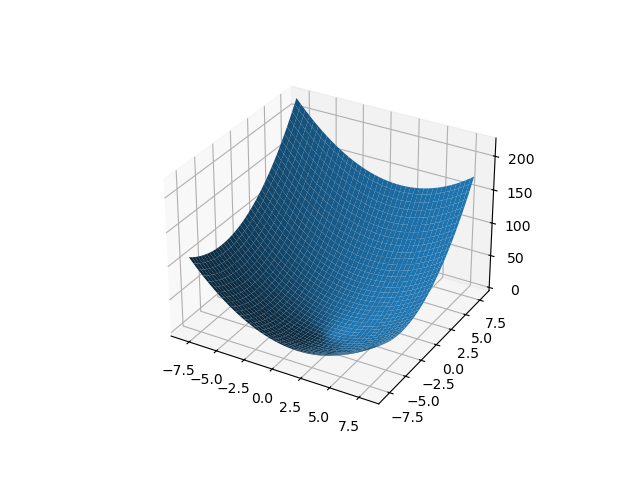

In [25]:

def f(x,y):
    return (x - 1) * (x - 2) + (y + 3) * (y + 4)

def animationDescenteSurface(pdep):
    point.set_data(xs[:pdep+1], ys[:pdep+1])
    if pdep == len(xs)-1:
        final.set_data(xs[-1:-2:-1], ys[-1:-2:-1])
    else:
        point.set_data(xs[:pdep+1], ys[:pdep+1])
    return point, final

x = np.linspace(-8, 8, 160) 
y = np.linspace(-8, 8, 160)
x, y = np.meshgrid(x, y)
z = f(x, y)
epsilo=0.1
nu=0.1
p0=(8,8)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z) 
# Animation
ani = FuncAnimation(fig, animationDescenteSurface, frames=len(x), interval=6, repeat=False)
plt.show()

2. Ecrivez une fonction python <code>animationDescenteSurface(pdep)</code> qui affiche cette surface et qui montre les étapes de la descente de gradient à partir du point initial <code>pdep</code> donné comme vecteur de deux coordonnées. Pour afficher un point 3D vous utiliserez la fonction <code>scatter</code> de <code>Axes3D</code>.

Minimum trouvé : (1, -5)


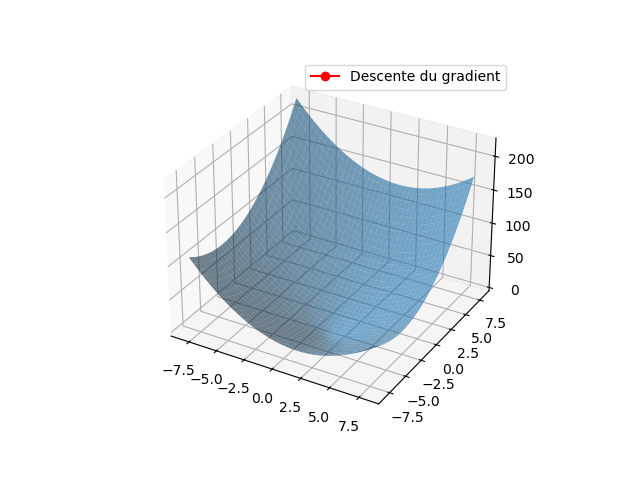

In [35]:
from numpy.linalg import norm
def animationDescenteSurface(pdep):
    epsilon=0.1
    nu=0.1
    x0y0=pdep
    xyprec=x0y0
    xycurent=xyprec
    xs = [xycurent[0]]
    ys =[xycurent[1]]
    zs = [f(xycurent[0], xycurent[1])]
    while(abs(xyprec[0]-xycurent[0])>epsilon or abs(xyprec[1]-xycurent[1])>epsilon):
        xyprec=xycurent
        xycurent=(xyprec[0]-nu*(2*xyprec[0]-3)*xyprec[0],xyprec[1]-nu*(2*xyprec[1]+7)*xyprec[1])
        xs.append(xycurent[0])
        ys.append(xycurent[1])
        zs.append(f(xycurent[0], xycurent[1]))
    print("Minimum trouvé :", xycurent)
    return xs,ys,zs


xs,ys,zs=animationDescenteSurface((1,-5))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# --- Surface de la fonction ---

X = np.linspace(-8, 8, 160)
Y = np.linspace(-8, 8, 160)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, alpha=0.6)

# --- Chemin de descente ---
point, = ax.plot([], [], [], 'ro-', label="Descente du gradient")

def update(frame):
    point.set_data(xs[:frame], ys[:frame])
    point.set_3d_properties(zs[:frame])
    return point,

ani = FuncAnimation(fig, update, frames=len(xs), interval=200, repeat=False)
ax.legend()
plt.show()


3. Testez avec comme point initial <code>pdep = (1, -5)</code> puis <code>(-1, -3)</code>, <code>(-1, -5)</code> et <code>(2, -4)</code>.

In [36]:
xs,ys,zs=animationDescenteSurface((-1,-3))



Minimum trouvé : (-1, -3)


### Exercice 5. Application : régression linéaire

On veut calculer la droite de régression linéaire correspondant à un nuage de
points 2D $\{(x_1, y_1), \cdots , (x_m, y_m)\}$, c'est-à-dire la droite $y = \theta_1x + \theta_0$ qui minimise le critère suivant : 
$$
\frac 1 m \sum \left( \theta_0 + \theta_1 x_i - y_i\right)^2.
$$

Autrement dit, on cherche à minimiser la moyenne des distances verticales entre chaque point du nuage et la droite. <br>
Utilisez une descente de gradient (en 2D) pour trouver les caractéristiques $\theta_0$ et $\theta_1$ de la droite de régression linéaire correspondant à un nuage de points. Pour générer un nuage de point, vous pouvez utiliser le code suivant :

In [37]:
from random import random

m = 40
sizeNoise = 10
x = [random()*50 + 5 for i in range(m)]
noise = [random() * sizeNoise for i in range(m)] # ou np.rand(m,1) * sizeNoise
pente = 0.8
b =  20
y = [b + pente*x[i] + noise[i] for i in range(m)] 

plt.plot(x,y,'bx')

In [ ]:

def gradientJ (theta, x, y):
    theta0 = theta[0]
    theta1 = theta[1]
    m = len(x)
    
    t0 = [theta0 + theta1 * x[i] - y[i] for i in range(m)]
    t1 = [x[i] * (theta0 + theta1 * x[i] - y[i]) for i in range(m)]

    dtheta0 = np.sum(t0)#theta0 + theta1 * x - y)
    dtheta1 = np.sum(t1)#x * (theta0 + theta1*x - y))
    
    dtheta0 = 2*dtheta0 / m
    dtheta1 = 2*dtheta1 / m
    return dtheta0, dtheta1


In [ ]:
from random import random

m = 40
sizeNoise = 10
x = [random()*50 + 5 for i in range(m)]
noise = [random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
pente = 0.8
b =  20
y = [b + pente*x[i] + noise[i] for i in range(m)] 

# descente de gradient
theta = (10, 1)
epsilon = 0.1
nu = 0.0005

dtheta0, dtheta1 = gradientJ (theta, x, y)

dist = norm([dtheta0,dtheta1]) 
  
while(dist > epsilon):
    theta = theta[0] - nu * dtheta0, theta[1] - nu * dtheta1
    dtheta0, dtheta1 = gradientJ (theta, x, y)
    dist = norm([dtheta0,dtheta1])

print(theta)

plt.plot(x, y, 'o')
xd = [0, 60]
yd = [theta[0], 60*theta[1]+ theta[0]]
plt.plot(xd , yd, 'r')

(24.943383639767543, 0.811661486085476)
